In [1]:
# Import
import numpy as np
from PIL import Image
import os

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
    

/Users/nandhinivijayakumar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
image_generator = ImageDataGenerator(preprocessing_function = preprocess_input)



In [3]:

# Create Data Loaders
train_loader = image_generator.flow_from_directory(
    directory = 'Intel_Image_Classification/Intel/reduced_seg_train_new',
    target_size = (224, 224),
    batch_size = 50,
    shuffle = True
)

test_loader = image_generator.flow_from_directory(
    directory ='Intel_Image_Classification/Intel/reduced_seg_test_new',
    target_size = (224, 224),
    batch_size = 50,
    shuffle = True
)

Found 2804 images belonging to 6 classes.
Found 598 images belonging to 6 classes.


In [4]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [5]:
idx_to_class = {val:key for key, val in dict(train_loader.class_indices).items()}
idx_to_class

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layers 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Output layer with 6 classes and softmax activation

# Print model summary
model.summary()


/Users/nandhinivijayakumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,285,126 (512.26 MB)

 Trainable params: 134,285,126 (512.26 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train and Test Steps
steps_train = len(train_loader)    # = round(num_train_images / batch_size)
steps_test = len(test_loader)

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [11]:
epochs = 5

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Fit the model for one epoch using the entire training dataset
    model_train_history = model.fit(
        train_loader,
        epochs=1,  # Train for one epoch
    )
    

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1508s 26s/step - accuracy: 0.1915 - loss: 1.7963
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 847s 15s/step - accuracy: 0.4262 - loss: 1.4595
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 828s 15s/step - accuracy: 0.5414 - loss: 1.1941
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 915s 16s/step - accuracy: 0.5480 - loss: 1.1023
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 786s 14s/step - accuracy: 0.5639 - loss: 1.0775


In [13]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_loader)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.5673 - loss: 1.0693
Test Loss: 1.069217324256897
Test Accuracy: 0.5702341198921204


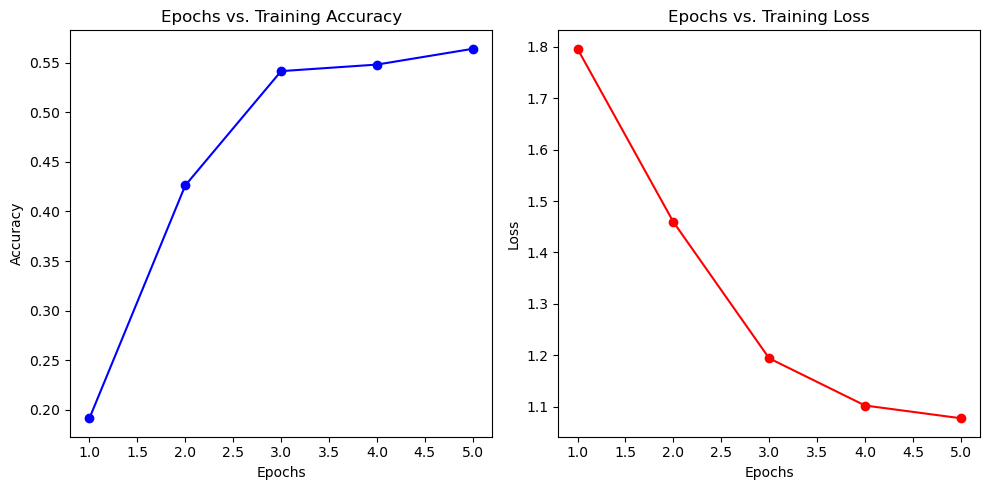

In [1]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]
accuracy = [0.1915, 0.4262, 0.5414, 0.5480, 0.5639]
loss = [1.7963, 1.4595, 1.1941, 1.1023, 1.0775]

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, marker='o', color='b')
plt.title('Epochs vs. Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='o', color='r')
plt.title('Epochs vs. Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()



In [8]:
from scipy.stats import ttest_rel

accuracy_values = [0.1915, 0.4262, 0.5414, 0.5480, 0.5639]
pretrained_accuracy_values = [0.909771740436554, 0.9204707741737366, 0.9233238101005554, 0.9283167123794556, 0.934022843837738]


# Perform the t-test
t_statistic, p_value = ttest_rel(pretrained_accuracy_values, accuracy_values)

# Print the results
print("Two-sample t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The differences between the performances of the two models is statistically significant.")
else:
    print("The differences between the performances of the two models is not statistically significant.")


Two-sample t-test results:
T-statistic: 7.070209827626113
P-value: 0.002111607076922447
There is a significant difference between the performances of the two models.


In [14]:
from scipy.stats import ttest_rel

loss_values = [1.7963, 1.4595, 1.1941, 1.1023, 1.0775]
pretrained_loss_values = [0.271918386220932, 0.24413785338401794, 0.2238422930240631, 0.20934823155403137, 0.18771040439605713]


# Perform the t-test
t_statistic, p_value = ttest_rel(pretrained_loss_values, loss_values)

# Print the results
print("Two-sample t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The differences between the performances of the two models is statistically significant.")
else:
    print("The differences between the performances of the two models is not statistically significant.")



Two-sample t-test results:
T-statistic: -9.010429690674817
P-value: 0.0008400850548416386
The differences between the performances of the two models is statistically significant.
